<h1><center>AutoScout Data Analysis Project</center></h1>

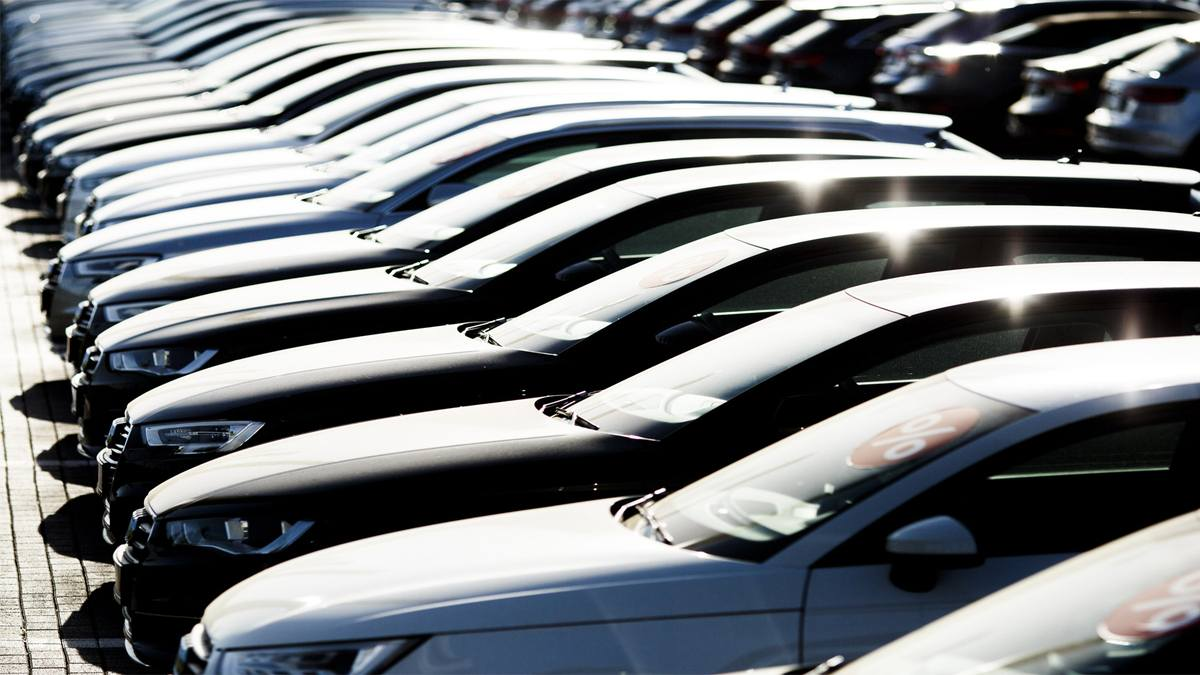

# Introduction
Welcome to "AutoScout Data Analysis Project". Auto Scout data which using for this project, scraped from the online car trading company in 2019,  contains many features of 9 different car models. In this project, I have used many commonly algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, and Scipy to analyze a clean dataset.

#### First of all, I have imported necessary libraries

In [1]:
pip install skimpy --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

C:\Users\berkay.akin\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_json("scout_car.json", lines=True)

In [4]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [6]:
df.describe()

,price,kW
count,15919.00,0.00
mean,18019.90,NaN
std,7386.17,NaN
min,13.00,NaN
25%,12850.00,NaN
50%,16900.00,NaN
75%,21900.00,NaN
max,74600.00,NaN


In [7]:
df.describe(include="object").T

,count,unique,top,freq
url,15919,15919,https://www.autoscout24.com//offers/audi-a1-sp...,1
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
km,15919,6690,10 km,1045
registration,15919,48,-/-,1597
prev_owner,9091,4,1 previous owner,8294
hp,15919,81,85 kW,2542
Type,15917,169,"[, Used, , Diesel (Particulate Filter)]",3475


In [8]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [9]:
df.rename(columns={"Next Inspection":"Next_Inspection",
                   "Inspection new":"Inspection_new",
                   "Full Service":"Full_Service",
                   "Non-smoking Vehicle":"Non_smoking",
                   "Offer Number":"Offer_Number",
                   "First Registration":"First_Regis",
                   "Body Color":"Body_Color",
                   "Paint Type":"Paint_Type",
                   "Body Color Original":"Body_Color_Original",
                   "Nr. of Doors":"Door_Num",
                   "Nr. of Seats":"Seat_Num",
                   "Model Code":"Model_Code",
                   "Gearing Type":"Gear_Type",
                   "Drive chain":"Drive_chain",
                   "CO2 Emission":"CO2_Emission",
                   "Emission Class":"Emission_Class",
                   "\nComfort & Convenience\n": "Comfort_Convenience",
                   "\nEntertainment & Media\n":"Entertainment_Media",
                   "\nExtras\n":"Extras",
                   "\nSafety & Security\n":"Safety_Security",
                   "Emission Label":"Emission_Label",
                   "Country version":"Country_version",
                   "Electricity consumption":"Electricity_consump",
                   "Last Service Date":"Last_Service",
                   "Other Fuel Types":"Other_Fuel_Types",
                   "Last Timing Belt Service Date":"Last_Belt_Service",
                   "Available from":"Available_from",
                  }, inplace=True)

In [10]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  15919 non-null  object 
 1   make_model           15919 non-null  object 
 2   short_description    15873 non-null  object 
 3   body_type            15859 non-null  object 
 4   price                15919 non-null  int64  
 5   vat                  11406 non-null  object 
 6   km                   15919 non-null  object 
 7   registration         15919 non-null  object 
 8   prev_owner           9091 non-null   object 
 9   kW                   0 non-null      float64
 10  hp                   15919 non-null  object 
 11  Type                 15917 non-null  object 
 12  Previous Owners      9279 non-null   object 
 13  Next_Inspection      3535 non-null   object 
 14  Inspection_new       3932 non-null   object 
 15  Warranty             10499 non-null 

In [12]:
df.isnull().sum()

url                        0
make_model                 0
short_description         46
body_type                 60
price                      0
vat                     4513
km                         0
registration               0
prev_owner              6828
kW                     15919
hp                         0
Type                       2
Previous Owners         6640
Next_Inspection        12384
Inspection_new         11987
Warranty                5420
Full_Service            7704
Non_smoking             8742
null                       0
Make                       0
Model                      0
Offer_Number            3175
First_Regis             1597
Body_Color               597
Paint_Type              5772
Body_Color_Original     3759
Upholstery              3720
Body                      60
Door_Num                 212
Seat_Num                 977
Model_Code             10941
Gear_Type                  0
Displacement             496
Cylinders               5680
Weight        

In [13]:
is_null = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
is_null

,isnull
url,0
make_model,0
short_description,46
body_type,60
price,0
vat,4513
km,0
registration,0
prev_owner,6828
kW,15919


In [14]:
per_null = round(pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['percentage_null']),2)
per_null

,percentage_null
url,0.00
make_model,0.00
short_description,0.29
body_type,0.38
price,0.00
vat,28.35
km,0.00
registration,0.00
prev_owner,42.89
kW,100.00


In [15]:
summary_null = pd.concat([is_null, per_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,Columns,isnull,percentage_null
0,url,0,0.00
1,make_model,0,0.00
2,short_description,46,0.29
3,body_type,60,0.38
4,price,0,0.00
5,vat,4513,28.35
6,km,0,0.00
7,registration,0,0.00
8,prev_owner,6828,42.89
9,kW,15919,100.00


In [16]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

In [17]:
df_nans(df, 90) 

kW                    100.00
Electricity_consump    99.14
Last_Service           96.44
Other_Fuel_Types       94.47
Availability           96.01
Last_Belt_Service      99.90
Available_from         98.29
dtype: float64

In [18]:
drop_columns = df_nans(df, 90).index
drop_columns

Index(['kW', 'Electricity_consump', 'Last_Service', 'Other_Fuel_Types',
       'Availability', 'Last_Belt_Service', 'Available_from'],
      dtype='object')

In [19]:
df.drop(drop_columns, axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  Type                 15917 non-null  object
 11  Previous Owners      9279 non-null   object
 12  Next_Inspection      3535 non-null   object
 13  Inspection_new       3932 non-null   object
 14  Warranty             10499 non-null  object
 15  Full_Service         8215 non-null   object
 16  Non_

In [21]:
df.drop("null", axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  Type                 15917 non-null  object
 11  Previous Owners      9279 non-null   object
 12  Next_Inspection      3535 non-null   object
 13  Inspection_new       3932 non-null   object
 14  Warranty             10499 non-null  object
 15  Full_Service         8215 non-null   object
 16  Non_

In [23]:
# since all data from AutoScout, I have dropped the url

df.drop("url", axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15919 non-null  object
 1   short_description    15873 non-null  object
 2   body_type            15859 non-null  object
 3   price                15919 non-null  int64 
 4   vat                  11406 non-null  object
 5   km                   15919 non-null  object
 6   registration         15919 non-null  object
 7   prev_owner           9091 non-null   object
 8   hp                   15919 non-null  object
 9   Type                 15917 non-null  object
 10  Previous Owners      9279 non-null   object
 11  Next_Inspection      3535 non-null   object
 12  Inspection_new       3932 non-null   object
 13  Warranty             10499 non-null  object
 14  Full_Service         8215 non-null   object
 15  Non_smoking          7177 non-null   object
 16  Make

In [25]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [26]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [27]:
df.Make = df.Make.str.strip("\n")
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [28]:
df.Model.value_counts(dropna=False)

[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [29]:
df.Model = df.Model.str[1]

In [30]:
df.Model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [31]:
# since make_model = Make + Model; therefore, I have dropped Make and Model

df.drop(["Make", "Model"], axis=1, inplace=True)

In [32]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'prev_owner', 'hp', 'Type', 'Previous Owners',
       'Next_Inspection', 'Inspection_new', 'Warranty', 'Full_Service',
       'Non_smoking', 'Offer_Number', 'First_Regis', 'Body_Color',
       'Paint_Type', 'Body_Color_Original', 'Upholstery', 'Body', 'Door_Num',
       'Seat_Num', 'Model_Code', 'Gear_Type', 'Displacement', 'Cylinders',
       'Weight', 'Drive_chain', 'Fuel', 'Consumption', 'CO2_Emission',
       'Emission_Class', 'Comfort_Convenience', 'Entertainment_Media',
       'Extras', 'Safety_Security', 'description', 'Emission_Label', 'Gears',
       'Country_version'],
      dtype='object')

In [33]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [34]:
# since all info at short description includes in our columns, I have dropped short_description

df.drop("short_description", axis=1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15919 non-null  object
 1   body_type            15859 non-null  object
 2   price                15919 non-null  int64 
 3   vat                  11406 non-null  object
 4   km                   15919 non-null  object
 5   registration         15919 non-null  object
 6   prev_owner           9091 non-null   object
 7   hp                   15919 non-null  object
 8   Type                 15917 non-null  object
 9   Previous Owners      9279 non-null   object
 10  Next_Inspection      3535 non-null   object
 11  Inspection_new       3932 non-null   object
 12  Warranty             10499 non-null  object
 13  Full_Service         8215 non-null   object
 14  Non_smoking          7177 non-null   object
 15  Offer_Number         12744 non-null  object
 16  Firs

In [36]:
df.description.value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [37]:
# since description's dtype is int then firstly, I change type as object after that I drop it

df.description.astype("str").nunique

df.drop("description", axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15919 non-null  object
 1   body_type            15859 non-null  object
 2   price                15919 non-null  int64 
 3   vat                  11406 non-null  object
 4   km                   15919 non-null  object
 5   registration         15919 non-null  object
 6   prev_owner           9091 non-null   object
 7   hp                   15919 non-null  object
 8   Type                 15917 non-null  object
 9   Previous Owners      9279 non-null   object
 10  Next_Inspection      3535 non-null   object
 11  Inspection_new       3932 non-null   object
 12  Warranty             10499 non-null  object
 13  Full_Service         8215 non-null   object
 14  Non_smoking          7177 non-null   object
 15  Offer_Number         12744 non-null  object
 16  Firs

In [39]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
None               60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [40]:
df.Body.value_counts(dropna=False)

[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [41]:
# since body_type and Body are same then first I change data type of Body to object then I drop it

df.Body.astype("str")

0        ['\n', 'Sedans', '\n']
1        ['\n', 'Sedans', '\n']
2        ['\n', 'Sedans', '\n']
3        ['\n', 'Sedans', '\n']
4        ['\n', 'Sedans', '\n']
                  ...          
15914       ['\n', 'Van', '\n']
15915       ['\n', 'Van', '\n']
15916       ['\n', 'Van', '\n']
15917       ['\n', 'Van', '\n']
15918       ['\n', 'Van', '\n']
Name: Body, Length: 15919, dtype: object

In [42]:
df.drop("Body", axis = 1, inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15919 non-null  object
 1   body_type            15859 non-null  object
 2   price                15919 non-null  int64 
 3   vat                  11406 non-null  object
 4   km                   15919 non-null  object
 5   registration         15919 non-null  object
 6   prev_owner           9091 non-null   object
 7   hp                   15919 non-null  object
 8   Type                 15917 non-null  object
 9   Previous Owners      9279 non-null   object
 10  Next_Inspection      3535 non-null   object
 11  Inspection_new       3932 non-null   object
 12  Warranty             10499 non-null  object
 13  Full_Service         8215 non-null   object
 14  Non_smoking          7177 non-null   object
 15  Offer_Number         12744 non-null  object
 16  Firs

In [44]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [45]:
df.price.isnull().sum()

0

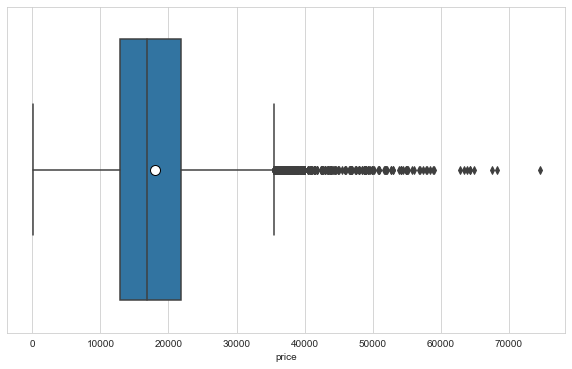

In [46]:
# sns.boxplot(df.price);

sns.boxplot(x=df.price, showmeans=True, meanprops={"marker":"o",
                                                "markerfacecolor":"white",
                                                "markeredgecolor":"black",
                                                "markersize":"10"});

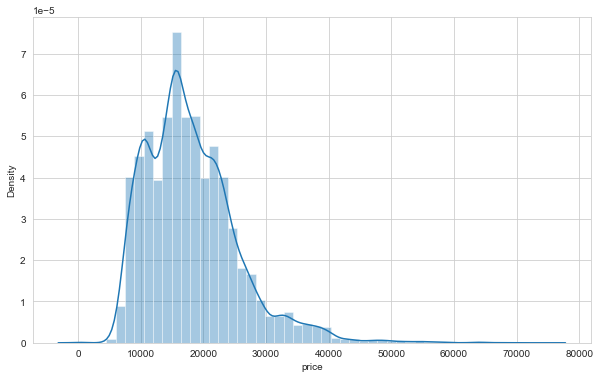

In [47]:
sns.distplot(df.price);

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15919 non-null  object
 1   body_type            15859 non-null  object
 2   price                15919 non-null  int64 
 3   vat                  11406 non-null  object
 4   km                   15919 non-null  object
 5   registration         15919 non-null  object
 6   prev_owner           9091 non-null   object
 7   hp                   15919 non-null  object
 8   Type                 15917 non-null  object
 9   Previous Owners      9279 non-null   object
 10  Next_Inspection      3535 non-null   object
 11  Inspection_new       3932 non-null   object
 12  Warranty             10499 non-null  object
 13  Full_Service         8215 non-null   object
 14  Non_smoking          7177 non-null   object
 15  Offer_Number         12744 non-null  object
 16  Firs

In [49]:
# VAT means that Value Added Tax (in European)

In [50]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

In [51]:
df.km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [52]:
df.km = df.km.str.replace(",", "").str.rstrip(" km").replace("-", np.nan).astype("float")

In [53]:
df.km.value_counts(dropna=False)

10.00       1045
NaN         1024
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: km, Length: 6690, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   registration         15919 non-null  object 
 6   prev_owner           9091 non-null   object 
 7   hp                   15919 non-null  object 
 8   Type                 15917 non-null  object 
 9   Previous Owners      9279 non-null   object 
 10  Next_Inspection      3535 non-null   object 
 11  Inspection_new       3932 non-null   object 
 12  Warranty             10499 non-null  object 
 13  Full_Service         8215 non-null   object 
 14  Non_smoking          7177 non-null   object 
 15  Offer_Number         12744 non-null 

In [55]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [56]:
df.First_Regis.value_counts(dropna=False)

[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First_Regis, dtype: int64

In [57]:
df.First_Regis = df.First_Regis.str[1].astype('float')

In [58]:
df.First_Regis.value_counts(dropna=False)

2018.00    4522
2016.00    3674
2017.00    3273
2019.00    2853
NaN        1597
Name: First_Regis, dtype: int64

In [59]:
# from datetime import date

# current_year = date.today().year
# df['age'] = current_year - df['First Registration']


# Since the data was taken from 2019, the vehicle age was calculated according to 2019.
# But if you want to calculate the vehicle age for the current year, 
# it is necessary to remove the above code block from the comment.

In [60]:
df['age'] = 2019 - df['First_Regis']

In [61]:
df[["age"]]

,age
0,3.00
1,2.00
2,3.00
3,3.00
4,3.00
...,...
15914,NaN
15915,0.00
15916,0.00
15917,0.00


In [62]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.00,80000.00,83450.00
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
hp,66 kW,141 kW,85 kW
Type,"[, Used, , Diesel (Particulate Filter)]","[, Used, , Gasoline]","[, Used, , Diesel (Particulate Filter)]"
Previous Owners,\n2\n,NaN,\n1\n


In [63]:
# since registration includes First_Regis, I have dropped registration

In [64]:
df.drop("registration", axis = 1, inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   prev_owner           9091 non-null   object 
 6   hp                   15919 non-null  object 
 7   Type                 15917 non-null  object 
 8   Previous Owners      9279 non-null   object 
 9   Next_Inspection      3535 non-null   object 
 10  Inspection_new       3932 non-null   object 
 11  Warranty             10499 non-null  object 
 12  Full_Service         8215 non-null   object 
 13  Non_smoking          7177 non-null   object 
 14  Offer_Number         12744 non-null  object 
 15  First_Regis          14322 non-null 

In [66]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [67]:
df["Previous Owners"].value_counts(dropna=False)

\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

In [68]:
# I prefer "Previous Owners" column because it has less NaN values. 
# But before dropping "prev_owner", I will fill "Previous Owners" with "prev_owner".

df["Previous_Owners"] = [item[0] if type(item) == list else item for item in df["Previous Owners"]]
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [69]:
df["Previous_Owners"] = df["Previous_Owners"].str.strip("\n").astype('float')
df["Previous_Owners"]

0       2.00
1        NaN
2       1.00
3       1.00
4       1.00
        ... 
15914    NaN
15915   1.00
15916   1.00
15917    NaN
15918   1.00
Name: Previous_Owners, Length: 15919, dtype: float64

In [70]:
df["Previous_Owners"].value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [71]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [72]:
df["prev_owner"] = df["prev_owner"].str.extract("(\d*)").astype('float')
df["prev_owner"]

0       2.00
1        NaN
2       1.00
3       1.00
4       1.00
        ... 
15914    NaN
15915   1.00
15916   1.00
15917    NaN
15918   1.00
Name: prev_owner, Length: 15919, dtype: float64

In [73]:
df[["Previous_Owners", "prev_owner"]].value_counts(dropna=False)

Previous_Owners  prev_owner
1.00             1.00          8294
NaN              NaN           6640
2.00             2.00           778
0.00             NaN            188
3.00             3.00            17
4.00             4.00             2
dtype: int64

In [74]:
df["Previous_Owners"].fillna(df["prev_owner"], inplace=True)
df["Previous_Owners"]

0       2.00
1        NaN
2       1.00
3       1.00
4       1.00
        ... 
15914    NaN
15915   1.00
15916   1.00
15917    NaN
15918   1.00
Name: Previous_Owners, Length: 15919, dtype: float64

In [75]:
df.Previous_Owners.value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [76]:
df[(df["Previous_Owners"].isna()) & (df["prev_owner"].notna())]

,make_model,body_type,price,vat,km,prev_owner,hp,Type,Previous Owners,Next_Inspection,Inspection_new,Warranty,Full_Service,Non_smoking,Offer_Number,First_Regis,Body_Color,Paint_Type,Body_Color_Original,Upholstery,Door_Num,Seat_Num,Model_Code,Gear_Type,Displacement,Cylinders,Weight,Drive_chain,Fuel,Consumption,CO2_Emission,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Emission_Label,Gears,Country_version,age,Previous_Owners


In [77]:
df.drop(["prev_owner", "Previous Owners"], axis=1, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   hp                   15919 non-null  object 
 6   Type                 15917 non-null  object 
 7   Next_Inspection      3535 non-null   object 
 8   Inspection_new       3932 non-null   object 
 9   Warranty             10499 non-null  object 
 10  Full_Service         8215 non-null   object 
 11  Non_smoking          7177 non-null   object 
 12  Offer_Number         12744 non-null  object 
 13  First_Regis          14322 non-null  float64
 14  Body_Color           15322 non-null  object 
 15  Paint_Type           10147 non-null 

In [79]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [80]:
df["hp_kW"] = df.hp.str.extract("(\d+)").astype('float')

In [81]:
df[["hp_kW"]]

,hp_kW
0,66.00
1,141.00
2,85.00
3,66.00
4,66.00
...,...
15914,147.00
15915,165.00
15916,146.00
15917,147.00


In [82]:
df.hp_kW.value_counts(dropna=False)

85.00     2542
66.00     2122
81.00     1402
100.00    1308
110.00    1112
70.00      888
125.00     707
51.00      695
55.00      569
118.00     516
92.00      466
121.00     392
147.00     380
77.00      345
56.00      286
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
NaN         88
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
82.00       22
52.00       22
78.00       20
1.00        20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
149.00       3
80.00        3
168.00       3
98.00        3
93.00        3
228.00       2
270.00       2
53.00        2
140.00       2
86.00        2
167.00       2
127.00       2
89.00        2
143.00       2
63.00        2
40.00     

In [83]:
df.drop('hp', axis=1, inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Next_Inspection      3535 non-null   object 
 7   Inspection_new       3932 non-null   object 
 8   Warranty             10499 non-null  object 
 9   Full_Service         8215 non-null   object 
 10  Non_smoking          7177 non-null   object 
 11  Offer_Number         12744 non-null  object 
 12  First_Regis          14322 non-null  float64
 13  Body_Color           15322 non-null  object 
 14  Paint_Type           10147 non-null  object 
 15  Body_Color_Original  12160 non-null 

In [85]:
df.Type.value_counts(dropna=False)

[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


In [86]:
df.Type.astype('str').value_counts()

['', 'Used', '', 'Diesel (Particulate Filter)']                                                                                 3475
['', 'Used', '', 'Diesel']                                                                                                      2516
['', 'Used', '', 'Gasoline']                                                                                                    2367
['', 'Used', '', 'Super 95']                                                                                                    1818
['', 'Pre-registered', '', 'Super 95']                                                                                           500
                                                                                                                                ... 
['', 'New', '', 'Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95']       1
['', 'Used', '', 'Super 95 / Super Plus 98 / Super E10 95 / Super Plu

In [87]:
df.Type = df.Type.str[1]

In [88]:
df.Type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Next_Inspection      3535 non-null   object 
 7   Inspection_new       3932 non-null   object 
 8   Warranty             10499 non-null  object 
 9   Full_Service         8215 non-null   object 
 10  Non_smoking          7177 non-null   object 
 11  Offer_Number         12744 non-null  object 
 12  First_Regis          14322 non-null  float64
 13  Body_Color           15322 non-null  object 
 14  Paint_Type           10147 non-null  object 
 15  Body_Color_Original  12160 non-null 

In [90]:
df.Next_Inspection.value_counts(dropna=False)

NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: Next_Inspection, Length: 1400, dtype: int64

In [91]:
df.Inspection_new.value_counts(dropna=False)

NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [92]:
df.Next_Inspection.astype("str").value_counts(dropna=False)

nan                                           12384
\n04/2022\n                                      62
\n03/2021\n                                      38
\n03/2022\n                                      36
\n06/2021\n                                      34
                                              ...  
['\n12/2018\n', '\n97 g CO2/km (comb)\n']         1
['\n03/2022\n', '\n1 (No sticker)\n']             1
['\n05/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n06/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n01/2022\n', '\n168 g CO2/km (comb)\n']        1
Name: Next_Inspection, Length: 1400, dtype: int64

In [93]:
df.Inspection_new.astype("str").value_counts(dropna=False)

nan                                                                                                            11987
['\nYes\n', '\nEuro 6\n']                                                                                        523
\nYes\n                                                                                                          362
['\nYes\n', '\n102 g CO2/km (comb)\n']                                                                           174
['\nYes\n', '\n4 (Green)\n']                                                                                     166
                                                                                                               ...  
['\nYes\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)', '\n', '4.9 l/100 km (country)', '\n']            1
['\nYes\n', '\n', '6.8 l/100 km (comb)', '\n', '8.5 l/100 km (city)', '\n', '6.1 l/100 km (country)', '\n']        1
['\nYes\n', '\n', '4.1 l/100 km (comb)', '\n', '7.5 l/100 km (ci

In [94]:
df["Inspection_new"] = [item[0] if type(item) == list else item for item in df["Inspection_new"]]

df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

df.Inspection_new

0        Yes
1        NaN
2        NaN
3        NaN
4        Yes
        ... 
15914    NaN
15915    NaN
15916    Yes
15917    NaN
15918    Yes
Name: Inspection_new, Length: 15919, dtype: object

In [95]:
df.Inspection_new.value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [96]:
df.Next_Inspection.value_counts(dropna=False)

NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: Next_Inspection, Length: 1400, dtype: int64

In [97]:
df.drop(["Next_Inspection"], axis=1, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             10499 non-null  object 
 8   Full_Service         8215 non-null   object 
 9   Non_smoking          7177 non-null   object 
 10  Offer_Number         12744 non-null  object 
 11  First_Regis          14322 non-null  float64
 12  Body_Color           15322 non-null  object 
 13  Paint_Type           10147 non-null  object 
 14  Body_Color_Original  12160 non-null  object 
 15  Upholstery           12199 non-null 

In [99]:
df.shape

(15919, 38)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             10499 non-null  object 
 8   Full_Service         8215 non-null   object 
 9   Non_smoking          7177 non-null   object 
 10  Offer_Number         12744 non-null  object 
 11  First_Regis          14322 non-null  float64
 12  Body_Color           15322 non-null  object 
 13  Paint_Type           10147 non-null  object 
 14  Body_Color_Original  12160 non-null  object 
 15  Upholstery           12199 non-null 

In [101]:
df.Warranty.value_counts(dropna=False)

NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [102]:
df.Warranty.astype("str").value_counts(dropna=False)

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [103]:
df.Warranty = df.Warranty.str.strip("\n").str.extract("(\d+)").astype("float")
df.Warranty.value_counts(dropna=False)

NaN      13862
12.00     1177
24.00      566
48.00      109
6.00        76
36.00       56
60.00       19
3.00        19
72.00       15
4.00         3
18.00        3
19.00        2
26.00        2
9.00         2
1.00         1
23.00        1
30.00        1
28.00        1
13.00        1
8.00         1
2.00         1
25.00        1
Name: Warranty, dtype: int64

In [104]:
df.Full_Service.astype("str").value_counts(dropna=False)

nan                                                                                                             7704
['\n', '\n', '\n4 (Green)\n']                                                                                   2235
['\n', '\n', '\nEuro 6\n']                                                                                      2097
['\n', '\n']                                                                                                    1702
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 399
                                                                                                                ... 
['\n', '\n', '\n80 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n84 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)

In [105]:
df.drop("Full_Service", axis=1, inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   Non_smoking          7177 non-null   object 
 9   Offer_Number         12744 non-null  object 
 10  First_Regis          14322 non-null  float64
 11  Body_Color           15322 non-null  object 
 12  Paint_Type           10147 non-null  object 
 13  Body_Color_Original  12160 non-null  object 
 14  Upholstery           12199 non-null  object 
 15  Door_Num             15707 non-null 

In [107]:
df.Non_smoking.value_counts(dropna=False)

NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [108]:
df.drop("Non_smoking", axis=1, inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   Offer_Number         12744 non-null  object 
 9   First_Regis          14322 non-null  float64
 10  Body_Color           15322 non-null  object 
 11  Paint_Type           10147 non-null  object 
 12  Body_Color_Original  12160 non-null  object 
 13  Upholstery           12199 non-null  object 
 14  Door_Num             15707 non-null  object 
 15  Seat_Num             14942 non-null 

In [110]:
df.Offer_Number.astype("str").value_counts(dropna=False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: Offer_Number, Length: 11441, dtype: int64

In [111]:
df.Offer_Number = df.Offer_Number.str[0].str.strip("\n")

In [112]:
df.Offer_Number.value_counts(dropna=False)

NaN                                         3175
LT67679                                       27
UN89904                                       27
XJ38068                                       27
JV03654                                       27
                                            ... 
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b       1
6701576                                        1
6701569                                        1
158121                                         1
Re_30000008029                                 1
Name: Offer_Number, Length: 11441, dtype: int64

In [113]:
df.duplicated(subset="Offer_Number").sum()

4478

In [114]:
df.drop("Offer_Number", axis=1, inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Body_Color           15322 non-null  object 
 10  Paint_Type           10147 non-null  object 
 11  Body_Color_Original  12160 non-null  object 
 12  Upholstery           12199 non-null  object 
 13  Door_Num             15707 non-null  object 
 14  Seat_Num             14942 non-null  object 
 15  Model_Code           4978 non-null  

In [116]:
df.Body_Color.astype("str").value_counts(dropna=False)

['\n', 'Black', '\n']     3745
['\n', 'Grey', '\n']      3505
['\n', 'White', '\n']     3406
['\n', 'Silver', '\n']    1647
['\n', 'Blue', '\n']      1431
['\n', 'Red', '\n']        957
nan                        597
['\n', 'Brown', '\n']      289
['\n', 'Green', '\n']      154
['\n', 'Beige', '\n']      108
['\n', 'Yellow', '\n']      51
['\n', 'Violet', '\n']      18
['\n', 'Bronze', '\n']       6
['\n', 'Orange', '\n']       3
['\n', 'Gold', '\n']         2
Name: Body_Color, dtype: int64

In [117]:
df.Body_Color = df.Body_Color.str[1]

In [118]:
df.Body_Color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

In [119]:
df.Body_Color_Original.astype("str").value_counts(dropna=False)

nan                                      3759
['\nOnyx Schwarz\n']                      338
['\nBianco\n']                            282
['\nMythosschwarz Metallic\n']            238
['\nBrillantschwarz\n']                   216
                                         ... 
['\nRouge-Braun (G0Y)\n']                   1
['\nVARI COLRI DISPONIBILI\n']              1
['\nKokosnussbraun Metallic\n']             1
['\nFarbe frei wählbar\n']                  1
['\nPerlmutt-Weiß Metallic (Weiß)\n']       1
Name: Body_Color_Original, Length: 1928, dtype: int64

In [120]:
df.Body_Color_Original = df.Body_Color_Original.str[0].str.strip("\n")

In [121]:
df.Body_Color_Original.value_counts(dropna=False)

NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: Body_Color_Original, Length: 1928, dtype: int64

In [122]:
df[df['Body_Color_Original'].notnull() & df['Body_Color'].isnull()][['Body_Color_Original', 'Body_Color']]

,Body_Color_Original,Body_Color
70,gris nano,NaN
122,wählbar,NaN
150,BLEU UTOPIA,NaN
195,BLEU UTOPIA,NaN
198,null,NaN
...,...,...
15382,TEINTE CAISS,NaN
15527,null,NaN
15619,wählbar - ggf gegen Aufpreis,NaN
15785,GNE NOIR ETOILE,NaN


In [123]:
df.drop(["Body_Color_Original", "Body_Color"], axis=1, inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Paint_Type           10147 non-null  object 
 10  Upholstery           12199 non-null  object 
 11  Door_Num             15707 non-null  object 
 12  Seat_Num             14942 non-null  object 
 13  Model_Code           4978 non-null   object 
 14  Gear_Type            15919 non-null  object 
 15  Displacement         15423 non-null 

In [125]:
df.Paint_Type.astype("str").value_counts(dropna=False)

['\nMetallic\n']       9794
nan                    5772
['\nUni/basic\n']       347
['\nPerl effect\n']       6
Name: Paint_Type, dtype: int64

In [126]:
df.Paint_Type = df.Paint_Type.str[0].str.strip("\n")

In [127]:
df.Paint_Type.value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [128]:
df.drop("Paint_Type", axis=1, inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Upholstery           12199 non-null  object 
 10  Door_Num             15707 non-null  object 
 11  Seat_Num             14942 non-null  object 
 12  Model_Code           4978 non-null   object 
 13  Gear_Type            15919 non-null  object 
 14  Displacement         15423 non-null  object 
 15  Cylinders            10239 non-null 

In [130]:
df.Upholstery.astype("str").value_counts(dropna=False)

['\nCloth, Black\n']           5821
nan                            3720
['\nPart leather, Black\n']    1121
['\nCloth\n']                  1005
['\nCloth, Grey\n']             891
['\nCloth, Other\n']            639
['\nFull leather, Black\n']     575
['\nBlack\n']                   491
['\nGrey\n']                    273
['\nOther, Other\n']            182
['\nPart leather\n']            140
['\nFull leather\n']            139
['\nFull leather, Brown\n']     116
['\nPart leather, Grey\n']      116
['\nOther, Black\n']            110
['\nFull leather, Other\n']      72
['\nFull leather, Grey\n']       67
['\nPart leather, Other\n']      65
['\nOther\n']                    56
['\nPart leather, Brown\n']      50
['\nalcantara, Black\n']         47
['\nVelour, Black\n']            36
['\nFull leather, Beige\n']      36
['\nCloth, Brown\n']             28
['\nVelour\n']                   16
['\nOther, Grey\n']              15
['\nCloth, Beige\n']             13
['\nBrown\n']               

In [131]:
df.Upholstery = [item[0] if type(item) == list else item for item in df.Upholstery]

In [132]:
df.Upholstery = df.Upholstery.str.strip("\n").str.split(", ")

In [133]:
df.Upholstery.astype("str").value_counts(dropna=False)

['Cloth', 'Black']           5821
nan                          3720
['Part leather', 'Black']    1121
['Cloth']                    1005
['Cloth', 'Grey']             891
['Cloth', 'Other']            639
['Full leather', 'Black']     575
['Black']                     491
['Grey']                      273
['Other', 'Other']            182
['Part leather']              140
['Full leather']              139
['Full leather', 'Brown']     116
['Part leather', 'Grey']      116
['Other', 'Black']            110
['Full leather', 'Other']      72
['Full leather', 'Grey']       67
['Part leather', 'Other']      65
['Other']                      56
['Part leather', 'Brown']      50
['alcantara', 'Black']         47
['Velour', 'Black']            36
['Full leather', 'Beige']      36
['Cloth', 'Brown']             28
['Velour']                     16
['Other', 'Grey']              15
['Cloth', 'Beige']             13
['Brown']                      12
['Cloth', 'Blue']              12
['Velour', 'Gr

In [134]:
upholstery_type = ["Cloth", "Part leather", "Full leather", "alcantara", "Velour"]

In [135]:
df["upholstery_type"] = df.Upholstery.apply(lambda x: x[0] if type(x)==list and x[0] in upholstery_type else np.nan)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Upholstery           12199 non-null  object 
 10  Door_Num             15707 non-null  object 
 11  Seat_Num             14942 non-null  object 
 12  Model_Code           4978 non-null   object 
 13  Gear_Type            15919 non-null  object 
 14  Displacement         15423 non-null  object 
 15  Cylinders            10239 non-null 

In [137]:
df.upholstery_type.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [138]:
upholstery_color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

In [139]:
def color_finder(x):
    if type(x) == list and len(x)==2:
        return x[1]
    elif type(x) == list and x[0] in upholstery_color:
        return x[0]
    else:
        return np.nan

In [140]:
df["upholstery_color"] = df.Upholstery.apply(color_finder)

In [141]:
df.upholstery_color.value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [142]:
df.drop("Upholstery", axis=1, inplace=True)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Door_Num             15707 non-null  object 
 10  Seat_Num             14942 non-null  object 
 11  Model_Code           4978 non-null   object 
 12  Gear_Type            15919 non-null  object 
 13  Displacement         15423 non-null  object 
 14  Cylinders            10239 non-null  object 
 15  Weight               8945 non-null  

In [144]:
df.Door_Num.astype("str").value_counts(dropna=False)

['\n5\n']    11575
['\n4\n']     3079
['\n3\n']      832
['\n2\n']      219
nan            212
['\n1\n']        1
['\n7\n']        1
Name: Door_Num, dtype: int64

In [145]:
df.Door_Num = df.Door_Num.str[0].str.strip("\n").astype("float")

In [146]:
df.Door_Num.value_counts(dropna=False)

5.00    11575
4.00     3079
3.00      832
2.00      219
NaN       212
1.00        1
7.00        1
Name: Door_Num, dtype: int64

In [147]:
df.drop("Door_Num", axis=1, inplace=True)

In [148]:
df.Seat_Num.astype("str").value_counts(dropna=False)

['\n5\n']    13336
['\n4\n']     1125
nan            977
['\n7\n']      362
['\n2\n']      116
['\n6\n']        2
['\n3\n']        1
Name: Seat_Num, dtype: int64

In [149]:
df.Seat_Num = df.Seat_Num.str[0].str.strip("\n").astype("float")

In [150]:
df.drop("Seat_Num", axis=1, inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Model_Code           4978 non-null   object 
 10  Gear_Type            15919 non-null  object 
 11  Displacement         15423 non-null  object 
 12  Cylinders            10239 non-null  object 
 13  Weight               8945 non-null   object 
 14  Drive_chain          9061 non-null   object 
 15  Fuel                 15919 non-null 

In [152]:
df.Model_Code.astype("str").value_counts(dropna=False)

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n0035/AVN\n']        1
['\n0035/BEM\n']        1
['\n0035/BAG\n']        1
['\n0035/BAA\n']        1
['\n3333/BKG\n']        1
Name: Model_Code, Length: 233, dtype: int64

In [153]:
df.drop("Model_Code", axis=1, inplace=True)

In [154]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Displacement         15423 non-null  object 
 11  Cylinders            10239 non-null  object 
 12  Weight               8945 non-null   object 
 13  Drive_chain          9061 non-null   object 
 14  Fuel                 15919 non-null  object 
 15  Consumption          14013 non-null 

In [155]:
df.Gear_Type.astype("str").value_counts(dropna=False)

['\n', 'Manual', '\n']            8153
['\n', 'Automatic', '\n']         7297
['\n', 'Semi-automatic', '\n']     469
Name: Gear_Type, dtype: int64

In [157]:
df.Gear_Type = df.Gear_Type.str[1]

In [158]:
df.Gear_Type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gear_Type, dtype: int64

In [164]:
df.Displacement.astype("str").value_counts(dropna=False)

['\n1,598 cc\n']     4761
['\n999 cc\n']       2438
['\n1,398 cc\n']     1314
['\n1,399 cc\n']      749
['\n1,229 cc\n']      677
['\n1,956 cc\n']      670
['\n1,461 cc\n']      595
['\n1,490 cc\n']      559
nan                   496
['\n1,422 cc\n']      467
['\n1,197 cc\n']      353
['\n898 cc\n']        351
['\n1,395 cc\n']      320
['\n1,968 cc\n']      301
['\n1,149 cc\n']      288
['\n1,618 cc\n']      212
['\n1,798 cc\n']      210
['\n1,498 cc\n']      196
['\n1,600 cc\n']      130
['\n1,248 cc\n']      110
['\n1,997 cc\n']      103
['\n1,364 cc\n']      102
['\n1,400 cc\n']       90
['\n998 cc\n']         72
['\n1,500 cc\n']       50
['\n2,000 cc\n']       46
['\n1,000 cc\n']       40
['\n1 cc\n']           36
['\n1,998 cc\n']       25
['\n2,480 cc\n']       20
['\n1,200 cc\n']       18
['\n1,984 cc\n']       18
['\n1,397 cc\n']       11
['\n899 cc\n']         11
['\n160 cc\n']          6
['\n929 cc\n']          5
['\n1,499 cc\n']        5
['\n997 cc\n']          4
['\n1,596 cc

In [172]:
df.Displacement = df.Displacement.str[0].str.strip('\n').str.replace(",","").str.extract('(\d+)').astype("float")

In [173]:
df.Displacement.value_counts(dropna=False)

1598.00     4761
999.00      2438
1398.00     1314
1399.00      749
1229.00      677
1956.00      670
1461.00      595
1490.00      559
NaN          496
1422.00      467
1197.00      353
898.00       351
1395.00      320
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1200.00       18
1984.00       18
1397.00       11
899.00        11
160.00         6
929.00         5
1499.00        5
997.00         4
1596.00        4
139.00         4
900.00         4
1599.00        3
1199.00        3
1396.00        3
1495.00        2
1589.00        2
1300.00        2
2.00           2
995.00         2
1496.00        1
890.00         1
1580.00        1
1995.00        1
1333.00        1
54.00          1
1533.00        1
1100.00        1
1350.00        1
16000.00      

In [174]:
df.drop("Displacement", axis=1, inplace=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  object 
 11  Weight               8945 non-null   object 
 12  Drive_chain          9061 non-null   object 
 13  Fuel                 15919 non-null  object 
 14  Consumption          14013 non-null  object 
 15  CO2_Emission         14111 non-null 

In [176]:
df.Cylinders.astype("str").value_counts(dropna=False)

['\n4\n']    8105
nan          5680
['\n3\n']    2104
['\n5\n']      22
['\n6\n']       3
['\n8\n']       2
['\n2\n']       2
['\n1\n']       1
Name: Cylinders, dtype: int64

In [182]:
df.Cylinders=df.Cylinders.str[0].str.strip('\n').astype("float")

In [183]:
df.Cylinders.value_counts(dropna=False)

4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: Cylinders, dtype: int64

In [184]:
df.Weight.astype("str").value_counts(dropna=False)

nan                 6974
['\n1,163 kg\n']     574
['\n1,360 kg\n']     356
['\n1,165 kg\n']     301
['\n1,335 kg\n']     242
                    ... 
['\n1,960 kg\n']       1
['\n1,258 kg\n']       1
['\n1,167 kg\n']       1
['\n1,331 kg\n']       1
['\n2,037 kg\n']       1
Name: Weight, Length: 435, dtype: int64

In [193]:
df.Weight=df.Weight.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d+)').astype('float')

In [194]:
df.Weight.value_counts(dropna=False)

NaN        6974
1163.00     574
1360.00     356
1165.00     301
1335.00     242
           ... 
1960.00       1
1258.00       1
1167.00       1
1331.00       1
2037.00       1
Name: Weight, Length: 435, dtype: int64

In [195]:
df.drop("Weight", axis=1, inplace=True)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Drive_chain          9061 non-null   object 
 12  Fuel                 15919 non-null  object 
 13  Consumption          14013 non-null  object 
 14  CO2_Emission         14111 non-null  object 
 15  Emission_Class       12898 non-null 

In [197]:
df.Drive_chain.astype("str").value_counts(dropna=False)

['\nfront\n']    8886
nan              6858
['\n4WD\n']       171
['\nrear\n']        4
Name: Drive_chain, dtype: int64

In [202]:
df.Drive_chain = df.Drive_chain.str[0].str.strip('\n')

In [203]:
df.Drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_chain, dtype: int64

In [204]:
df.drop("Drive_chain", axis=1, inplace=True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Consumption          14013 non-null  object 
 13  CO2_Emission         14111 non-null  object 
 14  Emission_Class       12898 non-null  object 
 15  Comfort_Convenience  14999 non-null 

In [206]:
df.Fuel.astype("str").value_counts(dropna=False)

['\n', 'Diesel (Particulate Filter)', '\n']                                                                                                       4315
['\n', 'Super 95', '\n']                                                                                                                          3338
['\n', 'Gasoline', '\n']                                                                                                                          3175
['\n', 'Diesel', '\n']                                                                                                                            2984
['\n', 'Super 95 / Regular/Benzine 91', '\n']                                                                                                      424
['\n', 'Regular/Benzine 91', '\n']                                                                                                                 354
['\n', 'Super E10 95', '\n']                                                                  

In [210]:
df.Fuel = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [211]:
df.Fuel.value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [215]:
df.Fuel = df.Fuel.str.split("(").str[0].str.strip()

In [216]:
df.Fuel.value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [218]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

df["Fuel"] = df.Fuel.apply(fueltype)

In [219]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Consumption          14013 non-null  object 
 13  CO2_Emission         14111 non-null  object 
 14  Emission_Class       12898 non-null  object 
 15  Comfort_Convenience  14999 non-null 

In [220]:
df.Consumption.astype("str").value_counts(dropna=False)

nan                                                                                                 1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                       304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                         276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                       257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                       253
                                                                                                    ... 
[['4.2 l/100 km (comb)'], ['5.3 l/100 km (city)'], ['3.6 l/100 km (country)']]                         1
['\n', '5.1 l/100 km (comb)', '\n', '6.4 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']       1
[['4.6 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['6.7 l/100 km (country)']]                         1
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']        

In [232]:
def comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] != []: return x[0][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return x[1]
    
    if type(x)==list and len(x)==7:
        return x[1]
    
    else:
        return None

In [233]:
def city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[3]
    
    else:
        return None

In [236]:
def country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None

In [239]:
df["comb_consump"] = df.Consumption.apply(comb).str.extract('(\S+)').astype("float")
df["city_consump"] = df.Consumption.apply(city).str.extract('(\S+)').astype("float")
df["country_consump"] = df.Consumption.apply(country).str.extract('(\S+)').astype("float")

In [240]:
df.comb_consump.value_counts(dropna=False)

NaN      2033
5.40      770
3.90      733
4.00      713
5.10      657
4.40      623
5.60      618
4.70      602
3.80      585
4.80      546
5.00      545
4.50      523
5.20      454
4.20      435
4.60      426
4.90      393
5.50      380
5.30      380
3.70      369
5.90      369
4.10      342
5.70      342
6.00      331
4.30      307
3.30      307
3.50      288
6.20      216
3.60      194
6.30      181
6.10      175
5.80      164
6.60      148
6.80      136
3.40      106
6.40       75
3.00       69
7.40       66
6.50       43
6.70       43
7.10       38
10.00      34
6.90       27
3.20       25
8.30       20
7.60       14
7.00       10
3.10        7
7.20        6
7.80        6
8.00        5
51.00       4
8.60        4
7.90        3
8.70        3
1.60        3
7.30        2
8.10        2
40.00       2
38.00       2
0.00        2
9.10        1
43.00       1
7.50        1
13.80       1
55.00       1
54.00       1
1.20        1
32.00       1
33.00       1
50.00       1
1.00        1
46.00 

In [242]:
df.city_consump.value_counts(dropna=False)

NaN      2436
5.00      669
5.80      633
4.50      580
4.30      533
5.10      479
6.80      454
7.20      445
7.30      435
4.60      417
7.80      413
5.90      389
5.70      376
4.20      353
6.60      352
6.70      346
5.20      345
6.30      338
5.40      321
4.10      320
4.00      300
4.70      289
7.50      267
7.10      258
6.00      251
7.60      248
3.90      245
3.50      230
6.90      223
5.50      216
6.20      211
7.70      204
7.00      194
7.40      179
6.50      162
8.70      161
6.10      152
8.20      140
4.40      136
6.40      121
8.00      110
5.60      104
5.30      101
7.90      101
4.80       72
4.90       58
3.70       53
3.40       50
8.60       42
9.60       42
8.30       41
8.50       39
9.20       34
3.30       30
3.80       26
8.10       25
10.20      21
11.30      19
10.00      16
9.90       15
9.40       14
9.10       12
3.00        9
8.40        7
0.00        6
9.80        5
11.50       4
11.00       4
11.20       4
62.00       4
8.90        4
10.80 

In [243]:
df.country_consump.value_counts(dropna=False)

NaN      2376
4.20     1178
3.70     1089
4.40      898
4.50      848
3.80      802
3.90      777
4.70      615
4.10      592
4.00      589
3.50      525
4.30      520
4.60      516
3.60      486
4.90      481
3.10      481
3.30      457
3.40      353
4.80      341
5.30      278
5.40      239
5.10      232
5.70      204
3.20      180
5.60      154
3.00      142
5.00      130
5.20      117
6.30       52
6.00       42
5.50       36
10.00      32
5.80       30
7.70       20
6.60       19
2.90       16
6.40       15
2.80        9
0.00        9
7.30        4
44.00       4
6.50        4
7.00        3
7.10        3
6.90        2
35.00       2
37.00       2
6.10        2
5.90        2
6.70        2
7.80        2
7.60        1
42.00       1
8.00        1
8.60        1
10.30       1
2.00        1
1.00        1
Name: country_consump, dtype: int64

In [244]:
df.drop("Consumption", axis=1, inplace=True)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  CO2_Emission         14111 non-null  object 
 13  Emission_Class       12898 non-null  object 
 14  Comfort_Convenience  14999 non-null  object 
 15  Entertainment_Media  14545 non-null 

In [246]:
df.CO2_Emission.astype("str").value_counts(dropna=False)

nan                              1808
['\n120 g CO2/km (comb)\n']       740
[[], [], []]                      628
['\n99 g CO2/km (comb)\n']        545
['\n97 g CO2/km (comb)\n']        537
                                 ... 
['\n14 g CO2/km (comb)\n']          1
['\n1,060 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']          1
['\n165 g CO2/km (comb)\n']         1
['\n193 g CO2/km (comb)\n']         1
Name: CO2_Emission, Length: 124, dtype: int64

In [251]:
df.CO2_Emission = df.CO2_Emission.str[0].str.strip("\n").str.replace(",", "").str.extract("(\d+)").astype("float")

In [252]:
df.CO2_Emission.value_counts(dropna=False)

NaN        2436
120.00      740
99.00       545
97.00       537
104.00      501
           ... 
14.00         1
1060.00       1
51.00         1
165.00        1
193.00        1
Name: CO2_Emission, Length: 123, dtype: int64

In [253]:
df.drop("CO2_Emission", axis=1, inplace=True)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Emission_Class       12898 non-null  object 
 13  Comfort_Convenience  14999 non-null  object 
 14  Entertainment_Media  14545 non-null  object 
 15  Extras               12957 non-null 

In [255]:
df.Emission_Class.astype("str").value_counts(dropna=False)

['\nEuro 6\n']          10139
nan                      3021
['\nEuro 6d-TEMP\n']     1845
[[], [], []]              607
['\nEuro 6c\n']           127
['\nEuro 5\n']             78
['\nEuro 6d\n']            62
['\nEuro 4\n']             40
Name: Emission_Class, dtype: int64

In [257]:
df.Emission_Class = df.Emission_Class.str[0].str.strip("\n")

In [258]:
df.Emission_Class.astype("str").value_counts(dropna=False)

Euro 6          10139
nan              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [259]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP": "Euro 6", "Euro 6c": "Euro 6", "Euro 6d": "Euro 6"}}, regex=True, inplace=True)

In [260]:
df.Emission_Class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [262]:
df.drop("Emission_Class", axis=1, inplace=True)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Comfort_Convenience  14999 non-null  object 
 13  Entertainment_Media  14545 non-null  object 
 14  Extras               12957 non-null  object 
 15  Safety_Security      14937 non-null 

In [264]:
df.Emission_Label.astype("str").value_counts(dropna=False)

nan                       11934
['\n4 (Green)\n']          3553
['\n1 (No sticker)\n']      381
[[], [], []]                 40
['\n5 (Blue)\n']              8
['\n3 (Yellow)\n']            2
['\n2 (Red)\n']               1
Name: Emission_Label, dtype: int64

In [269]:
df.drop("Emission_Label", axis=1, inplace=True)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Comfort_Convenience  14999 non-null  object 
 13  Entertainment_Media  14545 non-null  object 
 14  Extras               12957 non-null  object 
 15  Safety_Security      14937 non-null 

In [272]:
df.Comfort_Convenience.astype("str").value_counts(dropna=False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        920
['Air conditioning', 'Electrical side mirrors', 'Hill Holder', 'Power windows']                                                                                                                                                                                                                                                                                                                                                                          

In [273]:
df["Comfort_Convenience"] = [",".join(item) if type(item) == list else item for item in df["Comfort_Convenience"]]

In [275]:
df.Comfort_Convenience.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

In [276]:
df.Entertainment_Media.astype("str").value_counts(dropna=False)

nan                                                                                                                             1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                                                      1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                                982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                   783
['On-board computer', 'Radio']                                                                                                   487
                                                                                                                                ... 
['Bluetooth', 'CD player', 'Digital radio', 'Hands-free equipment', 'Radio']                                                       1
['CD player', 'Hands-free equipment', 'MP3', 'Radio', 'USB']         

In [278]:
df.Entertainment_Media =  [",".join(item) if type(item)==list else item  for item in df.Entertainment_Media]

In [279]:
df.Entertainment_Media.value_counts(dropna=False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Comfort_Convenience  14999 non-null  object 
 13  Entertainment_Media  14545 non-null  object 
 14  Extras               12957 non-null  object 
 15  Safety_Security      14937 non-null 

In [281]:
df.Extras.astype("str").value_counts(dropna=False)

['Alloy wheels']                                                                                                                 3245
nan                                                                                                                              2962
['Alloy wheels', 'Touch screen']                                                                                                  697
['Alloy wheels', 'Voice Control']                                                                                                 577
['Alloy wheels', 'Touch screen', 'Voice Control']                                                                                 541
                                                                                                                                 ... 
['Alloy wheels', 'Catalytic Converter', 'Shift paddles', 'Sport package', 'Sport seats', 'Sport suspension', 'Voice Control']       1
['Alloy wheels', 'Catalytic Converter', 'Roof rack', 'Sport pa

In [288]:
df["Extras"] = [",".join(item) if type(item)==list else item for item in df["Extras"]]

In [290]:
df.Extras.value_counts(dropna=False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Comfort_Convenience  14999 non-null  object 
 13  Entertainment_Media  14545 non-null  object 
 14  Extras               12957 non-null  object 
 15  Safety_Security      14937 non-null 

In [292]:
df.Safety_Security.astype("str").value_counts(dropna=False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                      982
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                                                                                                                                     538
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering

In [294]:
df["Safety_Security"] = [",".join(item) if type(item)==list else item for item in df.Safety_Security]

In [295]:
df.Safety_Security.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Comfort_Convenience  14999 non-null  object 
 13  Entertainment_Media  14545 non-null  object 
 14  Extras               12957 non-null  object 
 15  Safety_Security      14937 non-null 

In [297]:
df.Gears.astype("str").value_counts(dropna=False)

['\n6\n']     5822
nan           4712
['\n5\n']     3239
['\n7\n']     1908
['\n8\n']      224
['\n9\n']        6
['\n1\n']        2
['\n3\n']        2
['\n4\n']        2
['\n2\n']        1
['\n50\n']       1
Name: Gears, dtype: int64

In [299]:
df.Gears = df.Gears.str[0].str.strip("\n")

In [300]:
df.Gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [301]:
df.Country_version.astype("str").value_counts(dropna=False)

nan                       8333
['\nGermany\n']           4502
['\nItaly\n']             1038
['\nEuropean Union\n']     507
['\nNetherlands\n']        464
['\nSpain\n']              325
['\nBelgium\n']            314
['\nAustria\n']            208
['\nCzech Republic\n']      52
['\nPoland\n']              49
['\nFrance\n']              38
['\nDenmark\n']             33
['\nHungary\n']             28
['\nJapan\n']                8
['\nSlovakia\n']             4
['\nCroatia\n']              4
['\nSweden\n']               3
['\nRomania\n']              2
['\nBulgaria\n']             2
['\nLuxembourg\n']           1
['\nSwitzerland\n']          1
['\nSlovenia\n']             1
['\nEgypt\n']                1
['\nSerbia\n']               1
Name: Country_version, dtype: int64

In [303]:
df.Country_version = df.Country_version.str[0].str.strip("\n")

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Inspection_new       3932 non-null   object 
 7   Warranty             2057 non-null   float64
 8   First_Regis          14322 non-null  float64
 9   Gear_Type            15919 non-null  object 
 10  Cylinders            10239 non-null  float64
 11  Fuel                 15919 non-null  object 
 12  Comfort_Convenience  14999 non-null  object 
 13  Entertainment_Media  14545 non-null  object 
 14  Extras               12957 non-null  object 
 15  Safety_Security      14937 non-null 

In [305]:
df.shape

(15919, 26)

In [307]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,56013.00,80000.00,83450.00,73000.00,16200.00
Type,Used,Used,Used,Used,Used
Inspection_new,Yes,NaN,NaN,NaN,Yes
Warranty,NaN,NaN,NaN,NaN,NaN
First_Regis,2016.00,2017.00,2016.00,2016.00,2016.00
Gear_Type,Automatic,Automatic,Automatic,Automatic,Automatic


In [308]:
df.duplicated().sum()

1713

In [309]:
df[df.duplicated()].sort_values(by=['make_model', 'body_type', 'price', 'km']).head(20)

,make_model,body_type,price,vat,km,Type,Inspection_new,Warranty,First_Regis,Gear_Type,Cylinders,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Country_version,age,Previous_Owners,hp_kW,upholstery_type,upholstery_color,comb_consump,city_consump,country_consump
337,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
339,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
340,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
341,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
342,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
343,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
344,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
345,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
346,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70
349,Audi A1,Compact,14990,None,49351.00,Used,NaN,NaN,2016.00,Automatic,NaN,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Germany,3.00,2.00,66.00,Cloth,Grey,4.00,4.40,3.70


In [311]:
df.to_csv("AutoScout_cleaned_data.csv", index=False)

## End of data cleaning